# **PRE-PROCESSING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
dt = pd.read_csv('/content/crime_data.csv')
dt.head()

In [ ]:
data = dt.drop(['Unnamed: 0', 'crime$cluster'], axis=1)
data.head()

In [ ]:
missingdata = data.isnull().sum()
missingdata

In [ ]:
print(data[data.duplicated(keep=False)])

In [ ]:
scaler = StandardScaler()
datascale = scaler.fit_transform(data)

scaleddata = pd.DataFrame(datascale, columns = data.columns)
scaleddata.head()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 2))
sns.histplot(data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Data Awal")
sns.histplot(scaleddata, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Standarisasi Data")
plt.show()

# **K-MEANS**

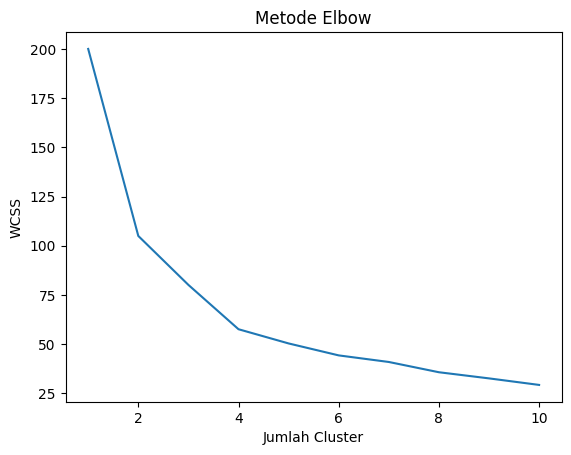

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaleddata)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
for nc in range(2,6):
    k1_cluster = KMeans(n_clusters=nc, random_state=0)
    y1_kmeans = k1_cluster.fit_predict(scaleddata)
    slht_scr= sklearn.metrics.silhouette_score(scaleddata, y1_kmeans)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263


In [ ]:
k_cluster = KMeans(n_clusters=4)
y_kmeans = k_cluster.fit_predict(scaleddata)

In [ ]:
ks = pd.Series(y_kmeans)
data['cluster']=ks
data.head(10)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,1


In [ ]:
X_numerics = data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

In [ ]:
KM_4_clusters = KMeans(n_clusters=4, init='k-means++', n_init=10).fit(X_numerics)

KM4_clustered = X_numerics.copy()
KM4_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_

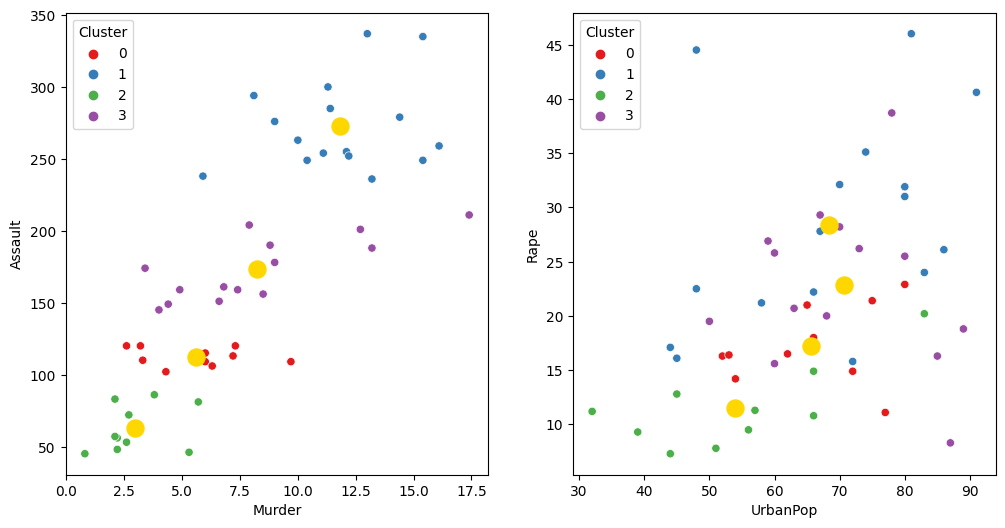

In [ ]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x='Murder', y='Assault', data=KM4_clustered,
                hue='Cluster', palette='Set1', ax=axes[0], legend='full')

sns.scatterplot(x='UrbanPop', y='Rape', data=KM4_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_4_clusters.cluster_centers_[:,0],KM_4_clusters.cluster_centers_[:,1], marker='o', s=150, c="gold")
axes[1].scatter(KM_4_clusters.cluster_centers_[:,2],KM_4_clusters.cluster_centers_[:,3], marker='o', s=150, c="gold")
plt.show()

In [ ]:
slht_scr_km = sklearn.metrics.silhouette_score(scaleddata, k_cluster.labels_)
slht_scr_km

0.42827542771142807

# **HIERARCHICAL CLUSTERING**

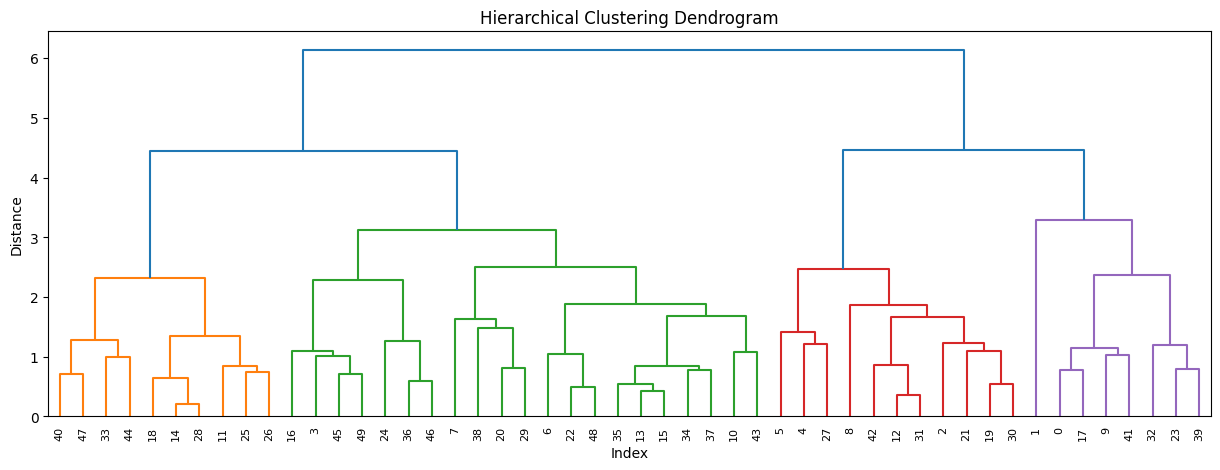

In [ ]:
z = linkage(scaleddata, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [ ]:
for nc in range(2,7):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='complete',affinity = "euclidean").fit(scaleddata)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr= sklearn.metrics.silhouette_score(scaleddata, cluster _labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4047944502519567
For n_clusters = 3 The average silhouette_score is : 0.36924314190439733
For n_clusters = 4 The average silhouette_score is : 0.31595507426164543
For n_clusters = 5 The average silhouette_score is : 0.3174348822319004
For n_clusters = 6 The average silhouette_score is : 0.26210629404644226


In [ ]:
h_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(scaleddata)
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels
datanew = pd.concat([data, pd.DataFrame({'cluster':cluster_labels})])
datanew.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236.0,58.0,21.2,1
1,10.0,263.0,48.0,44.5,3
2,8.1,294.0,80.0,31.0,3
3,8.8,190.0,50.0,19.5,1
4,9.0,276.0,91.0,40.6,3


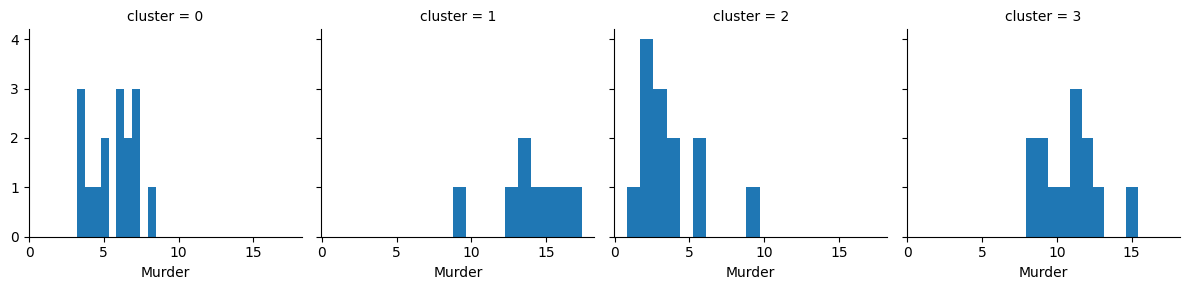

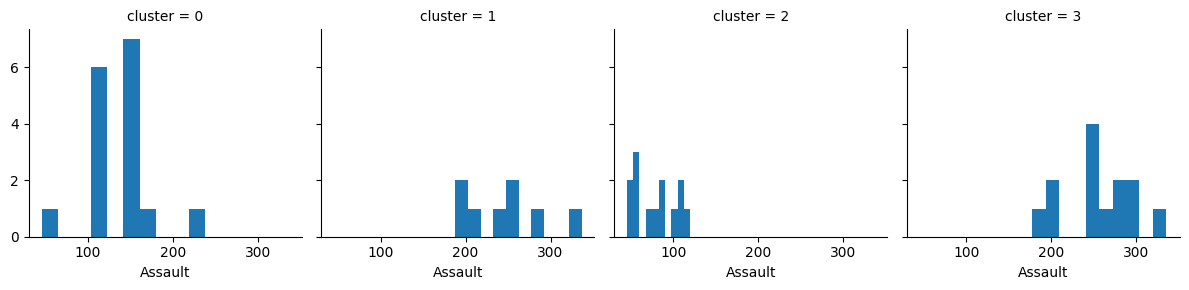

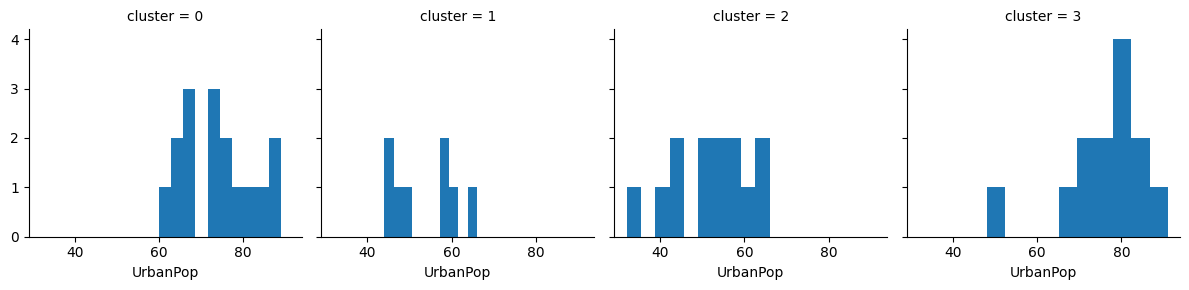

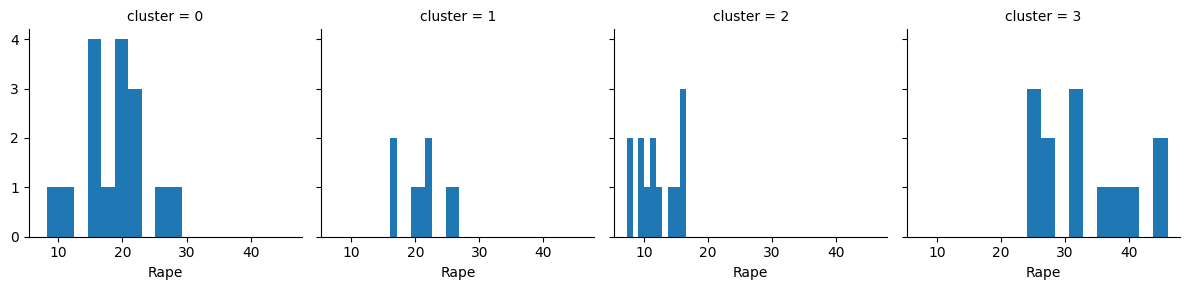

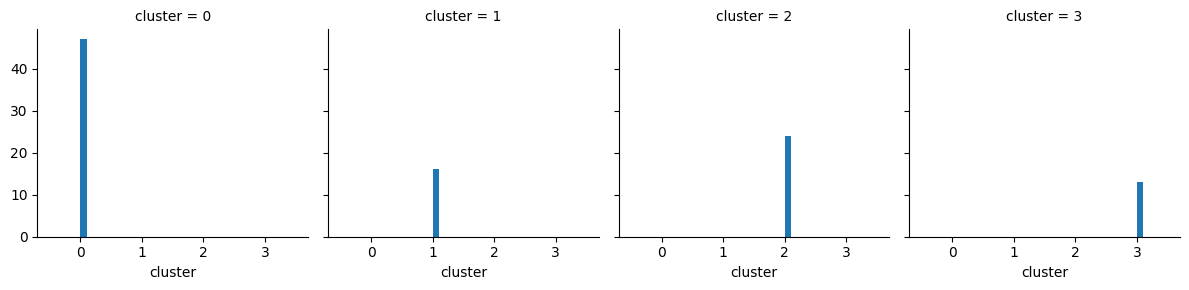

In [ ]:
for i in datanew:
  grid = sns.FacetGrid(datanew, col='cluster')
  grid.map(plt.hist, i)

In [ ]:
dist = 1 - cosine_similarity(scaleddata)

pca = PCA(n_components = 2)
pca = pca.fit_transform(dist)

In [ ]:
x, y = pca[:, 0], pca[:, 1]

warna = {0: 'red',
         1: 'blue',
         2: 'green'}
label_pca = {0: 'cluster 0',
             1: 'cluster 1',
             2: 'cluster 2'}
scaleddata = pd.DataFrame({'x': x, 'y': y, 'label':cluster_labels})
groups = scaleddata.groupby('label')

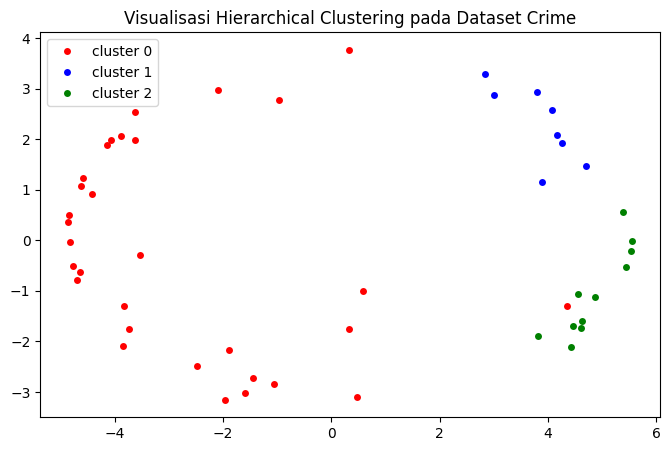

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
          color=warna[name], label=label_pca[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x', which='both', bottom='off', labelbottom='off')
  ax.tick_params(axis='y', which='both', left='off', labelleft='off')

ax.legend()
ax.set_title('Visualisasi Hierarchical Clustering pada Dataset Crime')
plt.show()

In [ ]:
slht_scr_hrc = sklearn.metrics.silhouette_score(scaleddata, cluster_labels)
slht_scr_hrc

0.523327279251809

# **DBSCAN**

In [ ]:
nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(scaleddata)
distances, indices = nn.kneighbors(scaleddata)

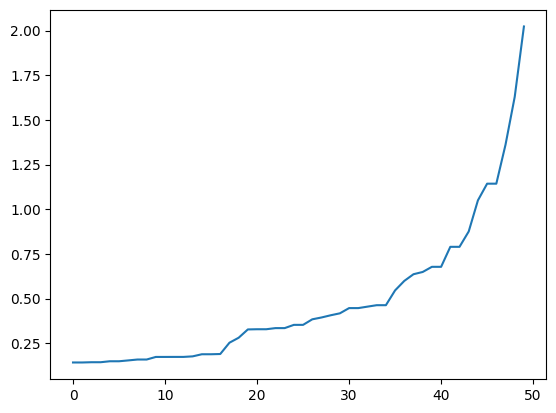

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [ ]:
d_cluster = DBSCAN(eps=1.125, min_samples=5)
data['cluster'] = d_cluster.fit_predict(scaleddata)
data.head(15)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,0


In [ ]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaleddata)
data['PCA1'] = data_2d[:, 0]
data['PCA2'] = data_2d[:, 1]

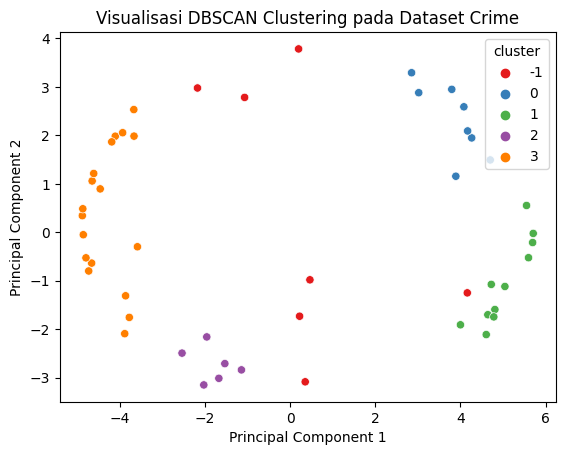

In [ ]:
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi DBSCAN Clustering pada Dataset Crime')
plt.show()

In [ ]:
slht_scr_dbs = sklearn.metrics.silhouette_score(scaleddata, d_cluster.labels_)
slht_scr_dbs

0.484582957608986

# Comparing All the Models Using Silhouette Score

In [ ]:
print("The Silhouette score of KMeans Clustering:",slht_scr_km)
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hrc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dbs)

The Silhouette score of KMeans Clustering: 0.42827542771142807
The Silhouette score of Hierarchical Clustering: 0.523327279251809
The Silhouette score of DB Scan Clustering: 0.484582957608986
